**Data Scientist dengan Cerita Kasus Retail**

Di era modern ini, informasi tersedia secara luas termasuk tentang peristiwa eksternal seperti tren pasar, berita industri, dan pergerakan pesaing. Ketersediaan data yang luas ini, menyebabkan meningkatnya minat pada metode untuk menggali informasi dan pengetahuan yang berguna dari data.

Dengan banyaknya data yang tersedia, perusahaan di hampir setiap industri berfokus pada pemanfaatan data untuk keunggulan kompetitif. Di masa lalu, perusahaan dapat mempekerjakan tim ahli statistik, pemodel, dan analis untuk mengeksplorasi kumpulan data secara manual.

Tetapi, volume dan variasi data telah jauh melampaui kapasitas analisis manual. Pada saat yang sama komputer menjadi lebih kuat, jaringan ada di mana-mana, dan algoritma telah dikembangkan. Dampaknya, tentu saja dapat menghubungkan kumpulan data untuk memungkinkan analisis yang lebih luas dan lebih dalam daripada yang dilakukan sebelumnya.

Fenomena tersebut telah memunculkan aplikasi bisnis yang semakin luas, dari prinsip-prinsip ilmu data (data science) dan teknik penambangan data (data mining).

Istilah data science (ilmu data) dan data mining (penambangan data) sering digunakan secara bergantian, tetapi memiliki pengertian yang cukup berbeda.

Data Science adalah adalah bidang studi yang mempelajari juga menerapkan alat dan teknik, untuk memperoleh wawasan yang berguna dari data.
Data Mining adalah proses menggali pengetahuan dari data, melalui teknologi yang menggabungkan prinsip-prinsip tersebut.

**Perbedaan Data Science, Data Mining, dan Machine Learning**

Data science melibatkan data mining dan machine learning. Selain itu, data science menggabungkan ilmu matematika dan statistika dengan ilmu komputer untuk tujuan analisis data.

Hal tersebut dapat diaplikasikan dengan algoritma tertentu, untuk memperoleh data (data mining) dan mendapatkan pola data serta dapat melakukan prediksi secara otomatis (machine learning). Jadi data mining dan machine learning sebenarnya adalah bagian dari data science.

 

Dalam penerapannya, data science memerlukan beberapa kemampuan berikut:

* Matematika Statistik
    - Pengolahan data (mengubah data menjadi format yang cocok untuk diproses machine learning, misalnya melakukan tokenisasi, normalisasi, mengubah format data)
    -  Analisis dan visualisasi data
* Computer Science (IT)
    - Pemrograman (misalnya bahasa R, Python, dan lainnya)
    - Pemahaman database dan query
* Pemahaman masalah terkait bisnis dan bagaimana data bisa digunakan sebagai solusi
 

Selain itu, data science juga melibatkan prinsip, proses, dan teknik untuk memahami fenomena melalui analisis data (secara otomatis). Data science dapat digunakan untuk meningkatkan pengambilan keputusan, terutama pengambilan keputusan berdasarkan data (Data-driven decision-making atau DDD). DDD mengacu pada praktik mendasarkan keputusan pada analisis data, bukan murni pada intuisi.

Sebagai contoh, tim marketing dapat memilih strategi pemasaran berdasarkan dengan analisis data tentang bagaimana konsumen bereaksi terhadap iklan yang berbeda - beda. Dengan mempelajari reaksi atau perilaku konsumen tersebut, tim marketing dapat menentukan pola pemasaran dan prediksi bagaimana pemasaran tersebut akan ditanggapi sehingga bisa menentukan target dengan tepat.

 

In [1]:
#Mengimpor library pandas & numpy
import pandas as pd
import numpy as np

#Membaca file
dataset_transaksi = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/transaksi_dqlab_retail.tsv', sep='\t')

#Menampilkan isi data
print(dataset_transaksi)


      Kode Transaksi              Nama Barang
0                 #1                     Kaos
1                 #1             Shampo Biasa
2                 #1      Sepatu Sport merk Z
3                 #1            Serum Vitamin
4                 #1  Baju Renang Pria Dewasa
...              ...                      ...
33663          #3450     Flat Shoes Ballerina
33664          #3450       Sepatu Sandal Anak
33665          #3450      Sepatu Kulit Casual
33666          #3450     Celana Jogger Casual
33667          #3450      Sepatu Sport merk Z

[33668 rows x 2 columns]


**Membuat Flag**


Sambil melakukan pekerjaanku, aku menyadari barang yang terdapat pada data transaksi retail belum dikelompokkan berdasarkan kode transaksi. Melihat permasalahan itu, aku merasa perlu mengelompokkan barang sesuai kode transaksi yang sama. Hal ini perlu dilakukan, untuk mengetahui barang apa saja yang terdapat pada basket yang sama.

Aku membutuhkan satu kolom bantuan diberi nama “Flag”. Kolom “Flag” ini akan membantu menandakan barang apa saja yang terdapat pada satu keranjang yang sama. 

In [2]:
#Kode sebelumnya
import pandas as pd
import numpy as np

dataset_transaksi = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/transaksi_dqlab_retail.tsv', sep='\t')

#Flag digunakan untuk menandakan barang/item terdapat pada basket.
dataset_transaksi['Flag'] = 1

#Menampilkan isi data
print(dataset_transaksi)

      Kode Transaksi              Nama Barang  Flag
0                 #1                     Kaos     1
1                 #1             Shampo Biasa     1
2                 #1      Sepatu Sport merk Z     1
3                 #1            Serum Vitamin     1
4                 #1  Baju Renang Pria Dewasa     1
...              ...                      ...   ...
33663          #3450     Flat Shoes Ballerina     1
33664          #3450       Sepatu Sandal Anak     1
33665          #3450      Sepatu Kulit Casual     1
33666          #3450     Celana Jogger Casual     1
33667          #3450      Sepatu Sport merk Z     1

[33668 rows x 3 columns]


In [3]:
#Kode sebelumnya
import pandas as pd
import numpy as np

dataset_transaksi = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/transaksi_dqlab_retail.tsv', sep='\t')
dataset_transaksi['Flag'] = 1

#Melakukan pengelompokkan Flag berdasarkan kolom Kode Transaksi dan Nama Barang
basket = dataset_transaksi.groupby(['Kode Transaksi','Nama Barang'])['Flag'].sum().unstack().reset_index().fillna(0).set_index('Kode Transaksi')

#Menampilkan basket
print(basket)

Nama Barang     Atasan Baju Belang  Atasan Kaos Putih  Baju Batik Wanita  \
Kode Transaksi                                                             
#1                             0.0                0.0                0.0   
#10                            0.0                0.0                1.0   
#100                           0.0                0.0                0.0   
#1000                          0.0                0.0                1.0   
#1001                          0.0                0.0                0.0   
...                            ...                ...                ...   
#995                           0.0                1.0                0.0   
#996                           0.0                0.0                0.0   
#997                           0.0                0.0                1.0   
#998                           0.0                0.0                1.0   
#999                           0.0                0.0                1.0   

Nama Barang

In [4]:
#Kode sebelumnya
import pandas as pd
import numpy as np

dataset_transaksi = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/transaksi_dqlab_retail.tsv', sep='\t')
dataset_transaksi['Flag'] = 1

basket = dataset_transaksi.groupby(['Kode Transaksi','Nama Barang'])['Flag'].sum().unstack().reset_index().fillna(0).set_index('Kode Transaksi')

#Membuat function untuk menormalisasi data
def encode_units(x):
	if x <= 0 :
		return 0
	if x > 0:
		return 1

#Menerapkan fungsi encode_units pada dataset	
basket_encode = basket.applymap(encode_units)

#Menampilkan basket_encode
print(basket_encode)

Nama Barang     Atasan Baju Belang  Atasan Kaos Putih  Baju Batik Wanita  \
Kode Transaksi                                                             
#1                               0                  0                  0   
#10                              0                  0                  1   
#100                             0                  0                  0   
#1000                            0                  0                  1   
#1001                            0                  0                  0   
...                            ...                ...                ...   
#995                             0                  1                  0   
#996                             0                  0                  0   
#997                             0                  0                  1   
#998                             0                  0                  1   
#999                             0                  0                  1   

Nama Barang

C:\Users\immab\AppData\Local\Temp\ipykernel_20744\3658414.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encode = basket.applymap(encode_units)


Mengenal Lift dan Confidence

Confidence:

Confidence adalah ukuran persentase seberapa kuat hubungan antar item dalam aturan asosiasi.
Contoh: pada suatu market, produk Teh dan Gula memiliki nilai confidence 50%, artinya pelanggan yang membeli Teh punya kemungkinan sebesar 50% juga membeli Gula.  
Confidence dihitung dengan rumus berikut:

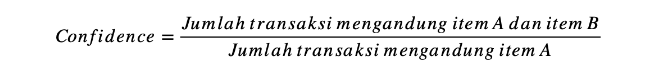

Lift:

Lift digunakan untuk memvalidasi aturan asosiasi, dengan mengukur ketepatan support dan confidence.
Kombinasi itemset dinyatakan valid dan kuat jika nilai Lift > 1.
Lift dihitung dengan rumus berikut:

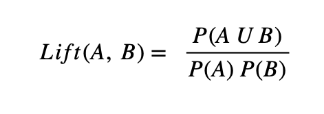


Notes:
P(A U B) = Jumlah kemunculan antara item A  dan item B dibagi dengan total transaksi.
P(A) P(B) = Jumlah kemunculan item A dikali dengan jumlah kemunculan item B pada total transaksi.

Jika hasil menunjukkan nilai < 1, maka memiliki korelasi negatif.
Jika hasil menunjukkan nilai > 1, maka memiliki korelasi positif.
Jika hasil menunjukkan nilai = 1, maka tidak ada korelasi.

Aku membuka modul tersebut dan mulai membacanya.

Algoritma Apriori adalah algoritma yang dapat digunakan untuk menentukan frequent itemset untuk aturan asosiasi boolean. Tujuan algoritma ini, untuk mencari kombinasi item yang memenuhi syarat minimum dari nilai support dalam basis data.

Frequent itemset, menunjukkan itemset yang memiliki frekuensi kemunculan lebih dari nilai minimum yang ditentukan. Misalkan nilai minimum 2, maka semua itemsets yang frekuensi kemunculannya lebih dari atau sama dengan 2 kali disebut frequent.

Nilai support dari sebuah item diperoleh dari jumlah transaksi mengandung item tersebut dibandingkan total transaksi. Jika dituliskan dalam rumus sebagai berikut:

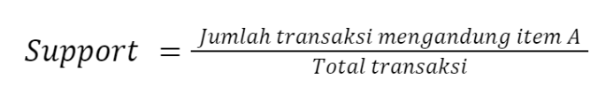

Nilai support dari 2 item dapat diperoleh dengan rumus berikut:

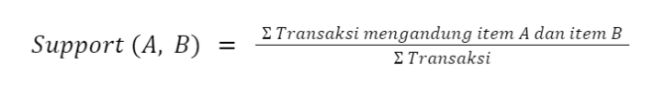

Memahami Cara Kerja Algoritma Apriori
Untuk lebih memahami cara kerja algoritma Apriori, aku dapat menggunakan dataset yang lebih sederhana sebagai ilustrasi. Misalkan terdapat dataset dari beragam transaksi. Dataset tersebut dapat mencari frequent itemset dan menghasilkan aturan asosiasi menggunakan algoritma Apriori.

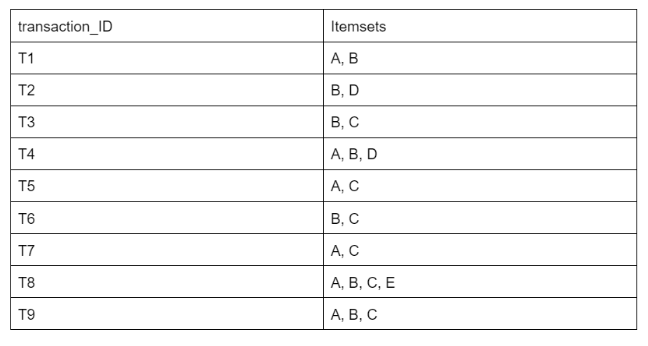

Misalkan minimum support 2 dan minimum confidence 50%.

 

Langkah pertama: Menghitung Candidate Set 1 dan Frequent Itemset 1

Buat tabel yang berisi dari jumlah support (frekuensi setiap itemset secara individual pada dataset) dari setiap itemset pada dataset.
Tabel ini disebut Candidate Set.

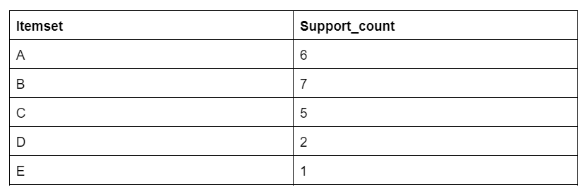

Kemudian menentukan Frequent itemset dengan menghilangkan itemset yang jumlahnya kurang dari minimum support.
Karena itemset E hanya berjumlah 1, maka itemset E dihilangkan.

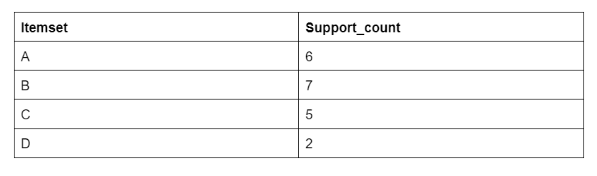
 

Langkah kedua: Menghasilkan Candidate 2 dan Frequent Itemset 2

Jika ingin menghasilkan tabel Candidate 2 dengan bantuan dari Frequent itemset 1.
Pada Candidate 2, dapat membentuk pasangan Itemset 1 dalam bentuk subset.

Setelah membuat subset, dapat ditemukan kembali jumlah support dari tabel dataset transaksi utama, yaitu berapa kali pasangan itemset 1 terjadi bersama pada dataset yang diberikan. Maka tabel Candidate 2 menjadi seperti berikut.

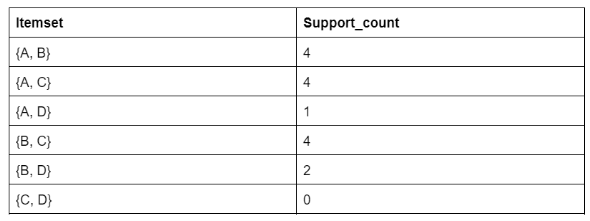

Perlu dibandingkan kembali jumlah support Candidate 2 dengan minimum support, kemudian itemset dengan jumlah kurang dari minimum support dihilangkan dari tabel Candidate 2. Tabel ini menjadi tabel Frequent itemset 2.
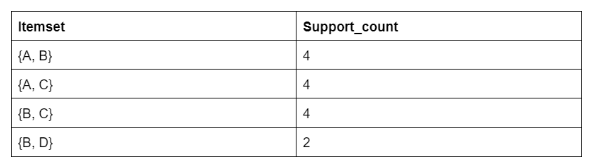
 

Langkah ketiga: Menghasilkan Candidate 3 dan Frequent Itemset 3

Dua proses yang sama ini dapat diulang, tetapi sekarang akan membentuk tabel Candidate 3 dengan subset dari tiga item bersama - sama, dan akan menghitung jumlah support dari dataset. Hasil tabel Candidate 3 menjadi seperti berikut.

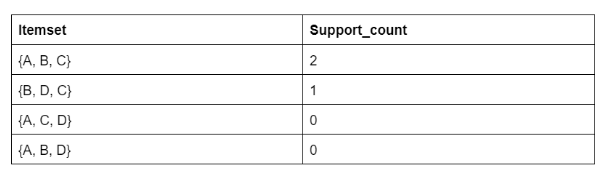

Kemudian tabel Frequent itemset 3 dapat dibuat, dengan menghilangkan itemset yang kurang dari minimum support sehingga hanya tersisa subset {A, B, C}. 

 

Langkah keempat: Mencari aturan asosiasi untuk subset

Untuk mendapatkan aturan asosiasi, kita membuat tabel baru dengan aturan yang mungkin dari  kombinasi yang terjadi {A, B, C}.
Dengan menggunakan algoritma Apriori, kombinasi produk dapat ditemukan dengan cara cepat dan efektif.

 

In [6]:
pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 435.7 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 980.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 1.5 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 1.4 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.4 MB 1.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 2.0 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 2.1 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 2.2 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.4 MB 2.4 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 2.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.4 MB 2.5 MB/s eta 0:00:01
   -------------------

In [8]:
#Kode sebelumnya
import pandas as pd
import numpy as np

dataset_transaksi = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/transaksi_dqlab_retail.tsv', sep='\t')
dataset_transaksi['Flag'] = 1

basket = dataset_transaksi.groupby(['Kode Transaksi','Nama Barang'])['Flag'].sum().unstack().reset_index().fillna(0).set_index('Kode Transaksi')

def encode_units(x):
    if x <= 0 :
        return 0
    if x > 0:
        return 1
	
basket_encode = basket.applymap(encode_units)

#Mengimport algoritma apriori
from mlxtend.frequent_patterns import apriori

#Menerapkan algoritma apriori untuk mendapatkan frequent_itemset
frequent_itemset = apriori(basket_encode, min_support=0.03, use_colnames=True)
print(frequent_itemset)

C:\Users\immab\AppData\Local\Temp\ipykernel_20744\1204788107.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encode = basket.applymap(encode_units)
c:\Users\immab\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


       support                                           itemsets
0     0.118841                                (Atasan Kaos Putih)
1     0.380290                                (Baju Batik Wanita)
2     0.121159                 (Baju Kaos Anak - Karakter Kartun)
3     0.115942                     (Baju Kaos Anak - Superheroes)
4     0.089275                               (Baju Kaos Olahraga)
...        ...                                                ...
1255  0.031304  (Tas Tangan, Tank Top, Celana Pendek Jeans, Co...
1256  0.042609  (Shampo Biasa, Baju Kemeja Putih, Serum Vitami...
1257  0.038551  (Tas Travel, Tank Top, Wedges Hitam, Baju Rena...
1258  0.047536  (Shampo Biasa, Serum Vitamin, Sepatu Sandal An...
1259  0.037391  (Tas Travel, Tank Top, Wedges Hitam, Baju Rena...

[1260 rows x 2 columns]


In [10]:
#Kode sebelumnya
import pandas as pd
import numpy as np
pd.set_option('display.max_column', 10)
dataset_transaksi = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/transaksi_dqlab_retail.tsv', sep='\t')
dataset_transaksi['Flag'] = 1

basket = dataset_transaksi.groupby(['Kode Transaksi','Nama Barang'])['Flag'].sum().unstack().reset_index().fillna(0).set_index('Kode Transaksi')

def encode_units(x):
    if x <= 0 :
        return 0
    if x > 0:
        return 1
	
basket_encode = basket.applymap(encode_units)

from mlxtend.frequent_patterns import apriori

frequent_itemset = apriori(basket_encode, min_support=0.03, use_colnames=True)

#Mengimport association_rules
from mlxtend.frequent_patterns import association_rules

#Menerapkan association_rules berdasarkan frequent_itemset
rules = association_rules(frequent_itemset, metric='lift', min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)
print(rules)

C:\Users\immab\AppData\Local\Temp\ipykernel_20744\1683287363.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encode = basket.applymap(encode_units)
c:\Users\immab\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                            antecedents  \
0     (Baju Kaos Anak - Karakter Kartun, Tank Top, C...   
1                             (Tas Tangan, Cover Koper)   
2     (Cover Koper, Baju Kaos Anak - Karakter Kartun...   
3                                (Tas Tangan, Tank Top)   
4     (Baju Kaos Anak - Karakter Kartun, Tank Top, C...   
...                                                 ...   
5143                                     (Wedges Hitam)   
5144                     (Serum Vitamin, Tas Waist Bag)   
5145                                (Baju Kemeja Putih)   
5146                        (Tali Pinggang Gesper Pria)   
5147                        (Hair Dryer, Serum Vitamin)   

                                            consequents  antecedent support  \
0                             (Tas Tangan, Cover Koper)            0.034493   
1     (Baju Kaos Anak - Karakter Kartun, Tank Top, C...            0.031884   
2                                (Tas Tangan, Tank Top

**Mengenal Time Series Analysis**


Time Series Analysis adalah cara khusus untuk menganalisis urutan titik data (data point) yang dikumpulkan selama interval waktu tertentu. Data dicatat atau direkam pada interval yang konsisten selama periode waktu tertentu. Selain itu, analisis ini juga menunjukkan bagaimana variabel berubah dari waktu ke waktu.

Time Series Analysis dapat membantu memprediksi data kedepannya berdasarkan data sebelumnya (historical data). Dengan begitu, Time Series Analysis dapat membantu untuk memahami penyebab yang mendasari tren atau pola sistemik dari waktu ke waktu.

Dengan menggunakan visualisasi data, pengguna bisnis dapat melihat tren musiman dan menggali lebih dalam mengapa tren ini terjadi.

Salah satu algoritma penerapan dari Time Series Analysis, merupakan model Autoregressive (AR). Model AR memprediksi perilaku masa depan berdasarkan perilaku masa lalu.

Model ini bisa digunakan ketika ada beberapa korelasi antara nilai dalam deret waktu dan nilai yang mendahului dan menggantikannya. Intinya, model AR menggunakan hasil pengamatan yang baru saja dilakukan untuk memprediksi nilai masa depan.

Model lain yang dapat digunakan adalah Moving Average (MA). MA pada dasarnya menyatakan bahwa pengamatan berikutnya adalah rata - rata dari setiap pengamatan sebelumnya.

Dari AR dan MA, kita mengenal ARIMA (Autoregressive Integrated Moving Average). Model ARIMA menggunakan nilai masa lalu dan sekarang dari variabel dependen untuk menghasilkan peramalan jangka pendek yang akurat.

In [11]:
#Mengimpor library pandas
import pandas as pd
pd.set_option('display.max_column', 20)

#Membaca file
dataset_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', delimiter=';')

#Menampilkan isi data
print(dataset_retail)

           no  Row_Num  Customer_ID Product  First_Transaction  \
0           1        1        29531   Jaket      1466304274396   
1           2        2        29531  Sepatu      1406077331494   
2           3        3       141526     Tas      1493349147000   
3           4        4       141526   Jaket      1493362372547   
4           5        5        37545  Sepatu      1429178498531   
...       ...      ...          ...     ...                ...   
99995   99996    99996        56249   Jaket      1464780939092   
99996   99997    99997        56249  Sepatu      1486619170763   
99997   99998    99998        34157   Jaket      1440924860706   
99998   99999    99999        34157  Sepatu      1415932948026   
99999  100000   100000       188822   Jaket      1540373764125   

       Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0         1538718482608                     1467681                 22  
1         1545735761270                     1269337          

In [12]:
#Mengimpor library pandas
import pandas as pd

#Membaca file
dataset_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', delimiter=';')

#Melihat detail tipe data
dataset_retail.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [13]:
#Mengimpor library pandas
import pandas as pd
pd.set_option('display.max_column', 20)

#Membaca file
dataset_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', delimiter=';')

#Mengimpor library datetime
import datetime

#Mengubah kolom First_Transaction dan Last_Transaction ke bentuk Datetime
dataset_retail['First_Transaction']= pd.to_datetime(pd.to_datetime(dataset_retail['First_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail['Last_Transaction']= pd.to_datetime(pd.to_datetime(dataset_retail['Last_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date


dataset_retail.sort_values('First_Transaction', inplace=True)

#Menampilkan isi data
print(dataset_retail)

          no  Row_Num  Customer_ID Product First_Transaction Last_Transaction  \
29588  29589    29589          666  Sepatu        2013-03-08       2013-03-08   
46452  46453    46453          680  Sepatu        2013-03-11       2013-03-11   
68535  68536    68536          699  Sepatu        2013-03-14       2013-03-14   
9205    9206     9206          780  Sepatu        2013-03-26       2017-09-10   
56435  56436    56436          796  Sepatu        2013-03-27       2013-03-27   
...      ...      ...          ...     ...               ...              ...   
77044  77045    77045       760138     Tas        2019-02-01       2019-02-01   
96598  96599    96599        55740   Jaket        2019-02-01       2019-02-01   
89817  89818    89818       845793  Sepatu        2019-02-01       2019-02-01   
82040  82041    82041       845987   Jaket        2019-02-01       2019-02-01   
51573  51574    51574       845158  Sepatu        2019-02-01       2019-02-01   

       Average_Transaction_

In [16]:
print(dataset_retail.dtypes)


no                             int64
Row_Num                        int64
Customer_ID                    int64
Product                       object
First_Transaction             object
Last_Transaction              object
Average_Transaction_Amount     int64
Count_Transaction              int64
dtype: object


In [15]:
#Kode sebelumnya
import pandas as pd
import datetime

dataset_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', delimiter=';')

dataset_retail['First_Transaction']= pd.to_datetime(pd.to_datetime(dataset_retail['First_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail['Last_Transaction']= pd.to_datetime(pd.to_datetime(dataset_retail['Last_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail.sort_values('First_Transaction', inplace=True)

#Kita akan buat agregasi rata-rata jumlah transaksi harian berdasarkan kolom First_Transaction
daily_avg_trx = dataset_retail.groupby('First_Transaction').mean()['Average_Transaction_Amount'].reset_index()

#Mengimport library matplotlib
import matplotlib.pyplot as plt

#Menampilkan nilai rata-rata jumlah transaksi dalam bentuk grafik
plt.plot(daily_avg_trx['First_Transaction'], daily_avg_trx['Average_Transaction_Amount'])
plt.xlabel('Transaksi Pertama')
plt.ylabel('Rata-rata jumlah transaksi')
plt.grid()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

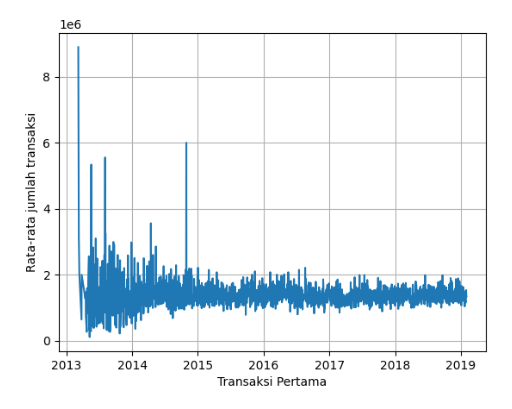

In [17]:
#Kode sebelumnya
import pandas as pd
import datetime

dataset_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', delimiter=';')

dataset_retail['First_Transaction'] = pd.to_datetime(pd.to_datetime(dataset_retail['First_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail['Last_Transaction'] = pd.to_datetime(pd.to_datetime(dataset_retail['Last_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail.sort_values('First_Transaction', inplace=True)

daily_avg_trx = dataset_retail.groupby('First_Transaction').mean()['Average_Transaction_Amount'].reset_index()

#Mengimpor library adfuller
from statsmodels.tsa.stattools import adfuller

#Mengecek stationary data
df_stationarityTest = adfuller(daily_avg_trx['Average_Transaction_Amount'])
print("p-value: ", df_stationarityTest[1])

TypeError: agg function failed [how->mean,dtype->object]

yang perlu diperhatikan adalah nilai p. 

Jika p < 0.05 artinya data tidak bergerak.

Jika p > 0.05, artinya data tidak stasioner.

Karena hasil yang didapatkan adalah P = 0 berarti data sudah stasioner.

In [18]:
#Kode sebelumnya
import pandas as pd
import datetime

dataset_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', delimiter=';')

dataset_retail['First_Transaction'] = pd.to_datetime(pd.to_datetime(dataset_retail['First_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail['Last_Transaction'] = pd.to_datetime(pd.to_datetime(dataset_retail['Last_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail.sort_values('First_Transaction', inplace=True)

daily_avg_trx = dataset_retail.groupby('First_Transaction').mean()['Average_Transaction_Amount'].reset_index()

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(8,8))

#Menampilkan Autocorrelation Plots
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(daily_avg_trx['Average_Transaction_Amount'], ax=axs[0])

#Menampilkan Partial Autocorrelation Plots
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(daily_avg_trx['Average_Transaction_Amount'], ax=axs[1])

plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

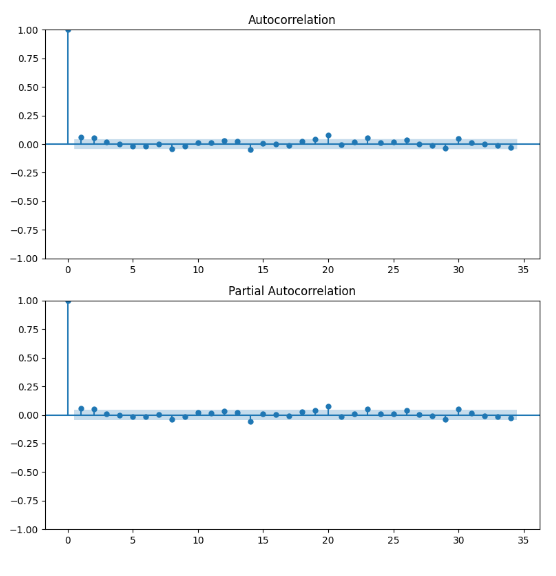

In [19]:
#Kode sebelumnya
import pandas as pd
import datetime

dataset_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', delimiter=';')

dataset_retail['First_Transaction'] = pd.to_datetime(pd.to_datetime(dataset_retail['First_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail['Last_Transaction'] = pd.to_datetime(pd.to_datetime(dataset_retail['Last_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail.sort_values('First_Transaction', inplace=True)

daily_avg_trx = dataset_retail.groupby('First_Transaction').mean()['Average_Transaction_Amount'].reset_index()

import matplotlib.pyplot as plt
fig, axs = plt.subplots(20, 1, figsize=(8,50))

#Menampilkan Partial Autocorrelation Plots
from statsmodels.graphics.tsaplots import plot_pacf

#Plot dengan lags 1 hingga 20
for i, ax in enumerate(axs):
	plot_pacf(daily_avg_trx['Average_Transaction_Amount'], lags=i+1, ax=ax)
	ax.set_title('Partial Autocorrelation with lag = %d' % (i+1,))

plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

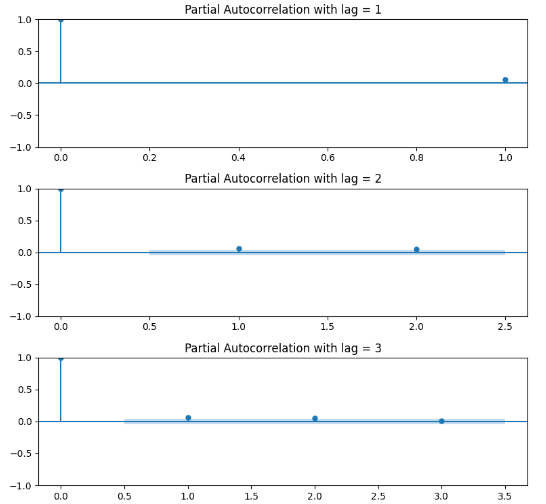

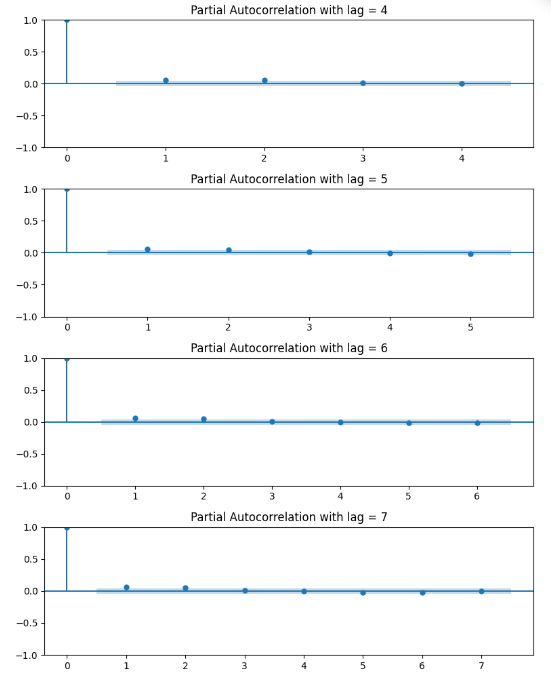

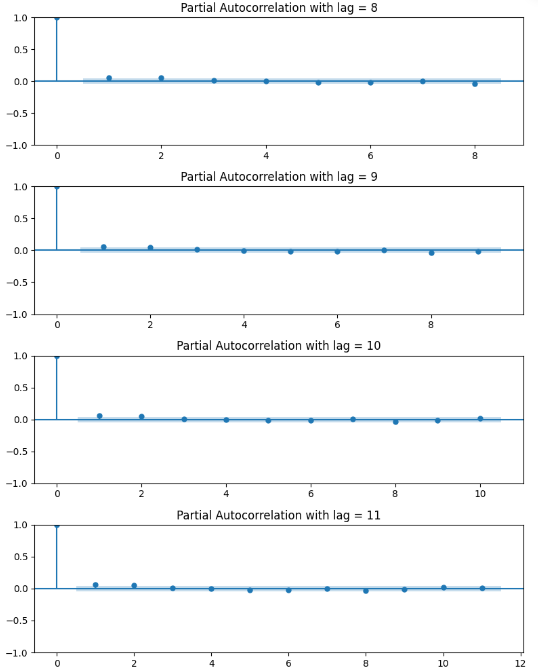

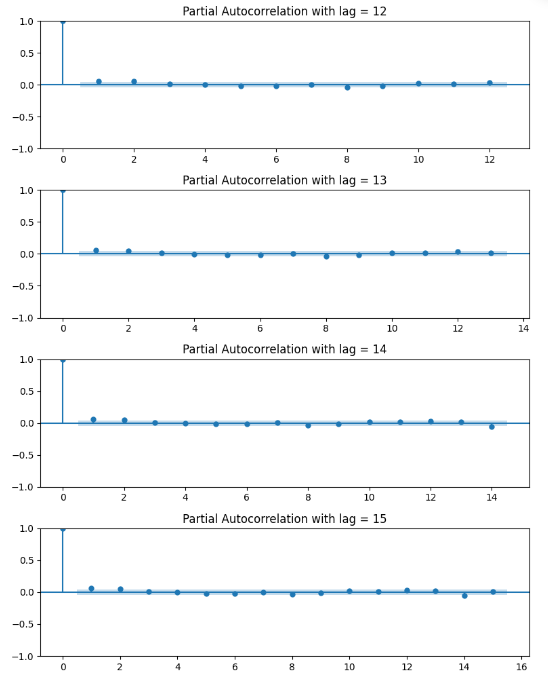

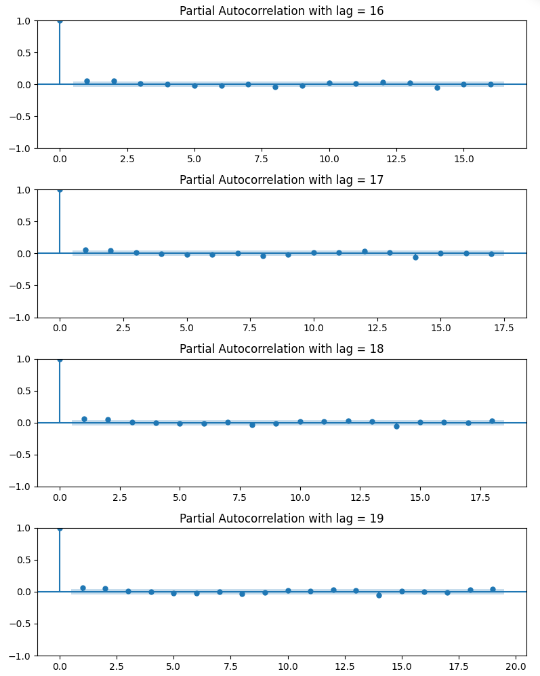

**Pemodelan dengan AutoRegression**

In [20]:
#Kode sebelumnya
import pandas as pd
import datetime

dataset_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', delimiter=';')

dataset_retail['First_Transaction'] = pd.to_datetime(pd.to_datetime(dataset_retail['First_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail['Last_Transaction'] = pd.to_datetime(pd.to_datetime(dataset_retail['Last_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail.sort_values('First_Transaction', inplace=True)

daily_avg_trx = dataset_retail.groupby('First_Transaction').mean()['Average_Transaction_Amount'].reset_index()

#Pembagian dataset atas training dan testing
train_data = daily_avg_trx['Average_Transaction_Amount'][:len(daily_avg_trx)-10]
test_data = daily_avg_trx['Average_Transaction_Amount'][len(daily_avg_trx)-10:]

print('Ukuran data training:', train_data.shape)
print('Ukuran data testing :', test_data.shape)

#Model auto regression
from statsmodels.tsa.ar_model import AutoReg

#Fit data ke dalam mode
ar_model = AutoReg(train_data, lags=10).fit()
print(ar_model.summary())


TypeError: agg function failed [how->mean,dtype->object]

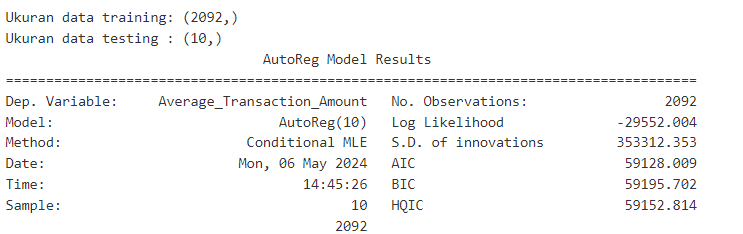


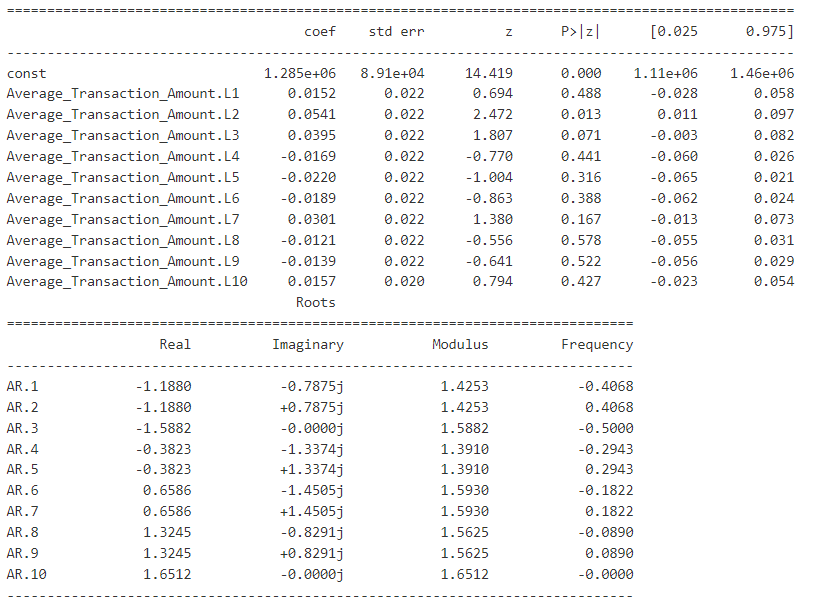

In [21]:
#Kode sebelumnya
import pandas as pd
import datetime

dataset_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', delimiter=';')

dataset_retail['First_Transaction'] = pd.to_datetime(pd.to_datetime(dataset_retail['First_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail['Last_Transaction'] = pd.to_datetime(pd.to_datetime(dataset_retail['Last_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail.sort_values('First_Transaction', inplace=True)

daily_avg_trx = dataset_retail.groupby('First_Transaction').mean()['Average_Transaction_Amount'].reset_index()

train_data = daily_avg_trx['Average_Transaction_Amount'][:len(daily_avg_trx)-10]
test_data = daily_avg_trx['Average_Transaction_Amount'][len(daily_avg_trx)-10:]

from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(train_data, lags=10).fit()

#Membuat prediksi dengan model
pred = ar_model.predict(start=len(train_data), end=(len(train_data)+len(test_data)-1), dynamic=False).rename('AR Predictions')

#Plot
import matplotlib.pyplot as plt
pred.plot(legend=True)
test_data.plot(legend=True)
plt.xlabel('Urutan data First_Transaction ke-')
plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

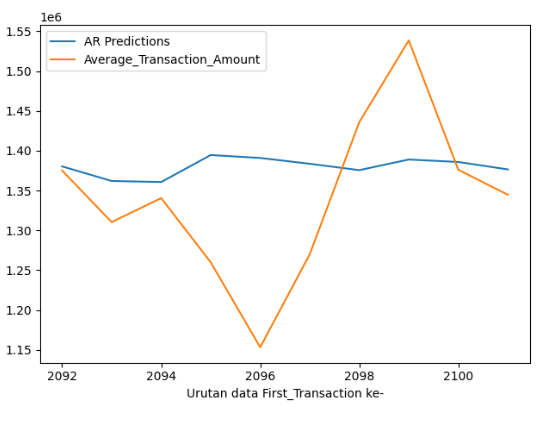

Aku menemukan sesuatu yang tidak terduga, ternyata hasil prediksi dengan AR tidak sesuai dengan data sebenarnya. Karena jika hasilnya sesuai, kedua garis harusnya memiliki bentuk yang kurang lebih sama.

“Hemm…kira-kira kenapa hasilnya seperti ini ya? Mungkin aku harus mempelajari lebih dalam tentang model AR di modul selanjutnya,” gumamku. Kalau seperti ini, aku harus segera memberikan hasil data kepada Andra.

Di luar dugaan, aku melihat Andra tersenyum puas melihat hasil prediksi yang kuberikan, “Oke, datanya bisa langsung diberikan ke Kroma ya. Selamat Sunyi, sekarang kamu bisa menguasai Market Basket Analysis dan Time Series Analysis,” ujar Andra kepadaku. 

Yeay! Aku senang sekali, karena hasil prediksiku memiliki peran yang penting. Selain itu, aku sudah bisa menguasai keterampilan baru hehehe..

**Mini Project**


Setelah mengerjakan kasus dari Kroma, aku dapet kasus lagi! Kali ini lebih sederhana tapi enggak bisa kuanggap remeh juga. Jadi, perusahaan retail tempat aku bekerja akan membuka toko offline. Di dalam toko tersebut, mereka berencana untuk melakukan peletakkan produk. Di mana produk yang memiliki asosiasi, harus diletakan berdekatan. 

Oleh karena itu, aku ditugaskan untuk menyiapkan data yang dapat dianalisis sebagai pendukung keputusan peletakan produk di toko tersebut. Untuk menyelesaikan tugasku, aku kembali menggunakan teknik Market Basket Analysis menggunakan algoritma Apriori yang sudah aku pelajari.

Aku akan menggunakan parameter min_support=0.04.

So, here we go!

 

Output berikut yang akan diperoleh di console berdasarkan perintah cetak di baris ke-26 dan ke-32, setelah melengkapi kode di code editor.

In [22]:
#membaca file dengan pandas
import pandas as pd

#gunakan function yang digunakan sama dengan membaca file csv
dataset_transaksi = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/transaksi_dqlab_retail.tsv', sep='\t')

dataset_transaksi['Flag'] = 1

#kelompokkan Kode Transaksi dan Nama Barang dengan menjumlahkan Flag
basket = dataset_transaksi.groupby(['Kode Transaksi','Nama Barang'])['Flag'].sum().unstack().reset_index().fillna(0).set_index('Kode Transaksi')

#Membuat function untuk menormalisasi data
def encode_units(x):
	if x <= 0:
		return 0
	if x > 0:
		return 1
	
#menerapkan fungsi yang telah dibuat untuk menormalisasi data
basket_encode = basket.applymap(encode_units)
 
from mlxtend.frequent_patterns import apriori

#menerapkan algoritma untuk apriori parameter untuk menentukan nilai minimal dari Support
frequent_itemset = apriori(basket_encode, min_support=0.04, use_colnames=True)
print(frequent_itemset)

from mlxtend.frequent_patterns import association_rules

#menerapkan aturan untuk mencari asosiasi antar produk gunakan dataset yang telah diterapkan apriori diurutkan berdasarkan metrik yang digunakan
rules = association_rules(frequent_itemset, metric='lift', min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)
print(rules)

C:\Users\immab\AppData\Local\Temp\ipykernel_20744\4272718528.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encode = basket.applymap(encode_units)
c:\Users\immab\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support                                           itemsets
0    0.118841                                (Atasan Kaos Putih)
1    0.380290                                (Baju Batik Wanita)
2    0.121159                 (Baju Kaos Anak - Karakter Kartun)
3    0.115942                     (Baju Kaos Anak - Superheroes)
4    0.089275                               (Baju Kaos Olahraga)
..        ...                                                ...
744  0.049855  (Sepatu Sekolah Hitam W, Sepatu Sandal Anak, S...
745  0.047826  (Tali Pinggang Gesper Pria, Shampo Biasa, Sepa...
746  0.045797  (Shampo Biasa, Serum Vitamin, Baju Batik Wanit...
747  0.042609  (Shampo Biasa, Baju Kemeja Putih, Serum Vitami...
748  0.047536  (Shampo Biasa, Serum Vitamin, Sepatu Sandal An...

[749 rows x 2 columns]
                                  antecedents  \
0               (Atasan Kaos Putih, Tank Top)   
1     (Baju Renang Pria Dewasa, Gembok Koper)   
2           (Atasan Kaos Putih, Gembok Koper)   
